## Fitting a linear regression model with Autograd

**Goal:** In this notebook you will see how to use the Autograd library from python to fit the parameters (slope and intercept) of a simple linear regression model via gradient descent (GD). 

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. 

**Dataset:** You work again with the systolic blood pressure and age data of 33 American women, which is generated and visualized in the upper part of the notebook. 

**Content:**

* fit a linear model via the sklearn machine learning library of python to get the fitted values of the intercept and slope as reference. 

* use the autograd library and the contained *grad* function to fit the parameters of the simple linear model via GD with the objective to minimize the MSE loss. 
    * define the mse loss function 
    * determine the gradients of the loss w.r.t. the parameters via automatic differentiation
    * use these gradients to update the parameter values via the update formula
    * iterate over the two former steps for many steps and check the current values of the estimated model parameters and the loss after each updatestep 
    * verify that the estimated parameter values converge to the values which you got from the sklearn fit.  



[open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/nb_ch03_07.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression

Here we read in the systolic blood pressure and the age of the 33 American women in our dataset. Then we use the sklearn library to find the optimal values for the slope a and the intercept b.

In [0]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)

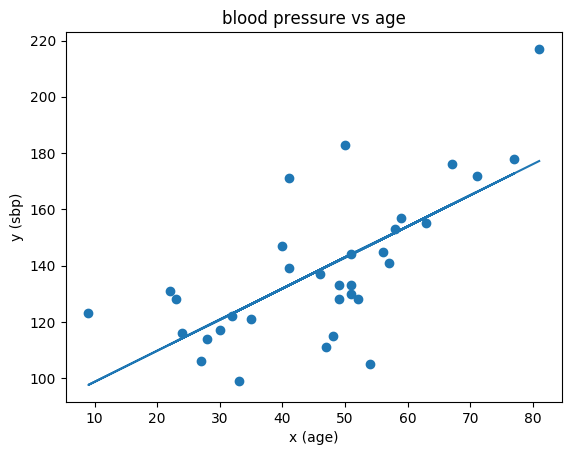

intercept =  87.67143 solpe =  1.1050216


In [0]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)

## Autograd

Now we want to use Autograd, a library for automatic differentiation. First we need to install it. Then we again can define our mse loss and calculate the minimal loss with the optimal values for the slope a and the inercept b from above.

In [0]:
!pip install autograd #You might need to install autograd


In [0]:
import autograd.numpy as np
from autograd import grad

In [0]:
def loss(a,b):
  y_hat = a*x + b
  return np.sum((y_hat - y)**2) / len(x)

In [0]:
loss(1.1050216,87.67143) #minimal loss for the optimal valuese for slope a and intercept b

349.2007871685606

Now we define that we want to have the gradients of the loss w.r.t to our two model parameters, the slope a and the intercept b. In the nex cell we print the gradient of the loss w.r.t to a and gradient of the loss w.r.t to b. Note that we calculated the loss for all data points and therefore we get diffrent gradients then in nb_04, where we only used one datapoint. Autograds *grad* function, takes a function as input and returs a function that computes its derivative. You can use the derivative function to compute the gradient at a specific position of the loss function.

In [0]:
grad_loss_a = grad(loss,0)
grad_loss_b = grad(loss,1)
print(grad_loss_a(0.,139.))
print(grad_loss_b(0.,139.))

-553.0909090909091
0.7272727272727257


Now, let's use gradient descent to optimize the slope a and the intercept b. The start values are a=0 and b=139  (139 is the mean of the blood pressure and slope a=0 implies that the model predicts the mean for each age). Our learning rate eta is 0.0004 and we do 80000 updatesteps with all 33 observations. 

In [0]:
eta = 0.0004
a = 0.0
b = 139.0
for i in range(80000):
    grad_a, grad_b  = grad_loss_a(a,b),grad_loss_b(a,b)
    a = a - eta * grad_a
    b = b - eta * grad_b
    if (i % 5000 == 0):
      print("Epoch:",i, "slope=",a,"intercept=",b,"gradient_a", grad_a, "gradient_b",grad_b, "mse=", loss(a,b))


Epoch: 0 slope= 0.22123636363636365 intercept= 138.99970909090908 gradient_a -553.0909090909091 gradient_b 0.7272727272727257 mse= 668.1919389204545
Epoch: 5000 slope= 0.47009054898348496 intercept= 120.60789269261207 gradient_a -0.1413740678267459 gradient_b 7.305982185132575 mse= 469.551787405303
Epoch: 10000 slope= 0.6975811188668976 intercept= 108.8070221024948 gradient_a -0.09035931211531079 gradient_b 4.688314726858429 mse= 398.7600615530303
Epoch: 15000 slope= 0.8435640896883931 intercept= 101.23430788222818 gradient_a -0.059386282256184586 gradient_b 3.008502382220645 mse= 369.60884232954544
Epoch: 20000 slope= 0.9372421279444895 intercept= 96.37483582948659 gradient_a -0.03760736638852791 gradient_b 1.9305910052675181 mse= 357.6046401515151
Epoch: 25000 slope= 0.9973560807661642 intercept= 93.25647324940135 gradient_a -0.023206306226256856 gradient_b 1.2388925263375947 mse= 352.6614583333333
Epoch: 30000 slope= 1.0359316219445518 intercept= 91.25539471546622 gradient_a -0.0140

Let's look at the final values for the slope a, the intercept b and the mse loss. We know form the closed formula solution that:

1.   optimal value for a: 1.1050216
2.   optimal value for b: 87.67143
3.   minimal loss: 349.200787168560

After 80000 update steps we are very close to the optimal values


In [0]:
print(a,b, loss(a,b))

1.1042025997277585 87.71386248723839 349.20108309659093
